# Stocks

In [43]:
import requests

url = "http://iex.lewagon.com/stable/stock/tsla/chart/3m"
api_data = requests.get(url).json()
stocks_df = pd.DataFrame(api_data)

In [44]:
stocks_df.head()

,date,open,close,high,low,volume,uOpen,uClose,uHigh,uLow,uVolume,change,changePercent,label,changeOverTime
0,2020-07-17,302.69,300.17,307.50,298.00,46649860,1513.45,1500.84,1537.51,1490.00,9329972,0.00,0.0000,"Jul 17, 20",0.000000
1,2020-07-20,303.80,328.60,330.00,297.60,85606835,1519.01,1643.00,1650.00,1488.00,17121367,28.43,9.4720,"Jul 20, 20",0.094720
2,2020-07-21,327.99,313.67,335.00,311.60,80786400,1639.93,1568.36,1675.00,1558.00,16157280,-14.93,-4.5429,"Jul 21, 20",0.044988
3,2020-07-22,319.80,318.47,325.28,312.40,70805400,1599.00,1592.33,1626.42,1562.00,14161080,4.79,1.5283,"Jul 22, 20",0.060959
4,2020-07-23,335.79,302.61,337.80,296.15,121642520,1678.95,1513.07,1689.00,1480.77,24328504,-15.85,-4.9776,"Jul 23, 20",0.008149


In [45]:
stocks_df["date"] = pd.to_datetime(stocks_df["date"])

In [46]:
stocks_df = stocks_df.set_index('date')

<AxesSubplot:xlabel='date'>

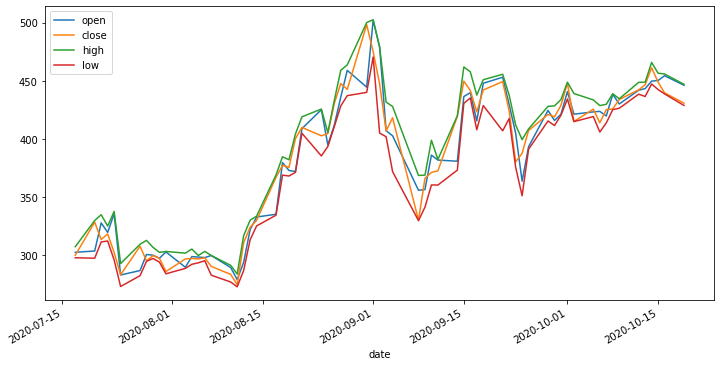

In [47]:
stocks_df[["open", "close", "high", "low"]].plot(figsize=(12,6))

In [48]:
# def get_stock(code, time):
#     url = f"http://iex.lewagon.com/stable/stock/{code}/chart/{time}"
#     api_data = requests.get(url).json()
#     stocks_df = pd.DataFrame(api_data)
#     stocks_df["date"] = pd.to_datetime(stocks_df["date"])
#     stocks_df = stocks_df.set_index('date')
#     return stocks_df[["open", "close", "high", "low"]].plot(figsize=(12,6))

In [49]:
# get_stock('tsla', '3m')

In [58]:
from get_stock import get_stock, get_info
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<AxesSubplot:xlabel='date'>

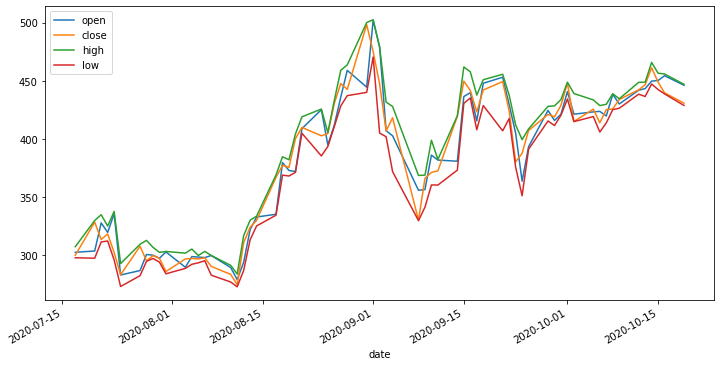

In [59]:
get_stock('tsla', '3m')

<AxesSubplot:xlabel='date'>

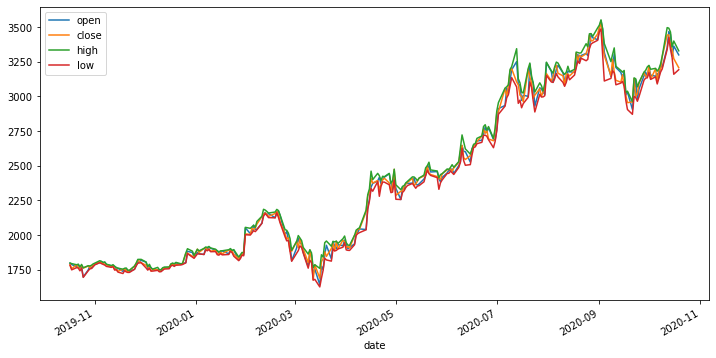

In [57]:
get_stock('amzn', '1y')

In [63]:
get_info('FB')['enterpriseValue']

713796029368.4401

In [75]:
url = "http://iex.lewagon.com/stable/stock/aapl/financials"
data = requests.get(url).json()

In [76]:
data['financials'][0]['researchAndDevelopment']

4758000000

In [80]:
url = "http://iex.lewagon.com/stable/stock/tsla/news/1"
data = requests.get(url).json()

In [79]:
url = "http://iex.lewagon.com/stable/stock/market/sector-performance"
data = requests.get(url).json()
data[-1]['performance']


-0.0212

In [218]:
apple_data = requests.get("http://iex.lewagon.com/stable/stock/aapl/chart/1y").json()

In [219]:
google_data = requests.get("http://iex.lewagon.com/stable/stock/GOOGL/chart/1y").json()

In [220]:
amazon_data = requests.get("http://iex.lewagon.com/stable/stock/amzn/chart/1y").json()

In [221]:
facebook_data = requests.get("http://iex.lewagon.com/stable/stock/fb/chart/1y").json()

In [222]:
gafa_df = pd.DataFrame(google_data)
gafa_df = gafa_df[["date","open"]].rename(columns={'open':'Google stock price'})

In [223]:
apple_df = pd.DataFrame(apple_data)[["open"]]
facebook_df = pd.DataFrame(facebook_data)[["open"]]
amazon_df = pd.DataFrame(amazon_data)[["open"]]

In [224]:
gafa_df = gafa_df.merge(apple_df, on=None, left_index=True, right_index=True).rename(columns={'open':'Apple stock price'})
gafa_df = gafa_df.merge(facebook_df, on=None, left_index=True, right_index=True).rename(columns={'open':'Facebook stock price'})
gafa_df = gafa_df.merge(amazon_df, on=None, left_index=True, right_index=True).rename(columns={'open':'Amazon stock price'})

In [225]:
gafa_df["date"] = pd.to_datetime(gafa_df["date"])
gafa_df = gafa_df.set_index('date')

<AxesSubplot:xlabel='date'>

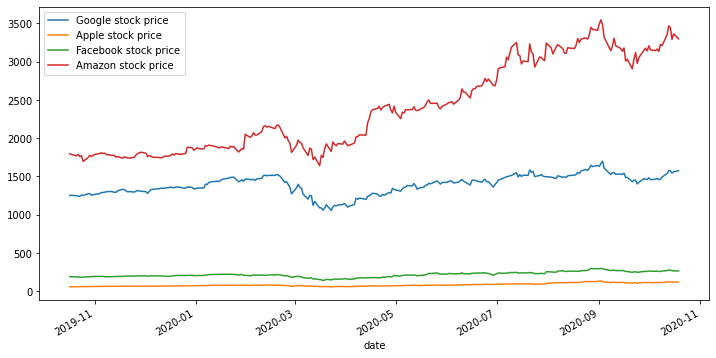

In [226]:
gafa_df[["Google stock price", "Apple stock price", "Facebook stock price", "Amazon stock price"]].plot(figsize=(12,6))

In [227]:
def normalize(df):
    count = len(gafa_df.columns)
    col_names = df.columns
    for i in range(count):
        df[f"{col_names[i]} normalized"] = ''
        base = df[f"{col_names[i]}"][0]
        for index, row in df.iterrows():
#             print(index, row[i])
#             print(row[i]/base)
            df.loc[index, f"{col_names[i]} normalized"] = row[i]/base 


In [228]:
gafa_test = gafa_df

In [229]:
normalize(gafa_test)

In [230]:
gafa_test

,Google stock price,Apple stock price,Facebook stock price,Amazon stock price,Google stock price normalized,Apple stock price normalized,Facebook stock price normalized,Amazon stock price normalized
date,,,,,,,,
2019-10-17,1251.40,58.77,190.30,1796.49,1,1,1,1
2019-10-18,1254.69,58.65,190.23,1787.80,1.00263,0.997958,0.999632,0.995163
2019-10-21,1248.70,59.38,187.04,1769.66,0.997842,1.01038,0.982869,0.985065
2019-10-22,1244.48,60.29,190.00,1788.15,0.99447,1.02586,0.998424,0.995358
2019-10-23,1240.21,60.53,182.01,1761.30,0.991058,1.02995,0.956437,0.980412
...,...,...,...,...,...,...,...,...
2020-10-13,1577.01,125.27,277.58,3467.99,1.2602,2.13153,1.45864,1.93043
2020-10-14,1574.60,121.00,277.62,3447.00,1.25827,2.05887,1.45885,1.91874
2020-10-15,1544.50,118.72,267.60,3292.01,1.23422,2.02008,1.4062,1.83247


<AxesSubplot:xlabel='date'>

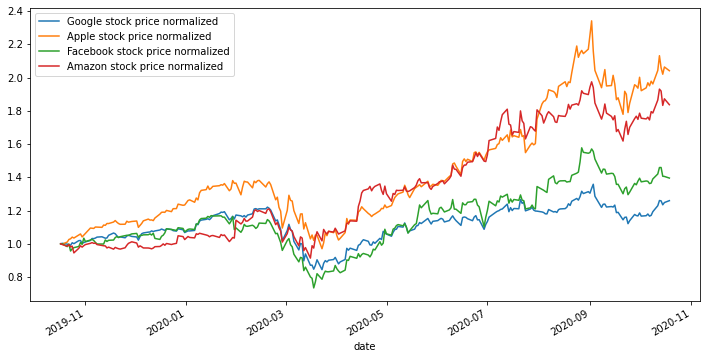

In [232]:
gafa_test[["Google stock price normalized", "Apple stock price normalized", "Facebook stock price normalized", "Amazon stock price normalized"]].plot(figsize=(12,6))